# Market Segment Analysis

library("MSA")

data("mcdonalds", package = "MSA")

names(mcdonalds)

dim(mcdonalds)

head(mcdonalds, 3)

This R code is importing the "MSA" package and then loading the "mcdonalds" data set that is included in the package. The code then uses three different functions to display information about the "mcdonalds" data set:

names(mcdonalds) - This function displays the names of the variables (columns) in the "mcdonalds" data set.

dim(mcdonalds) - This function displays the dimensions of the "mcdonalds" data set, which is the number of rows and columns.

head(mcdonalds, 3) - This function displays the first 3 rows of the "mcdonalds" data set, which can be useful for quickly getting a sense of the data and what it looks like.

In [1]:
import warnings

# This will suppress all warnings
warnings.filterwarnings("ignore")

### Eqivalent python codes are

In [2]:
import pandas as pd
mcdonalds = pd.read_csv("mcdonalds.csv")

In [3]:
mcdonalds.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [4]:
mcdonalds.shape

(1453, 15)

In [5]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


## Next

MD.x <- as.matrix(mcdonalds[, 1:11])

MD.x <- (MD.x == "Yes") + 0

round(colMeans(MD.x), 2)

MD.x <- as.matrix(mcdonalds[, 1:11]) - This creates a new matrix called MD.x by selecting the first 11 columns of the mcdonalds data set and converting them to a matrix using the as.matrix() function.

MD.x <- (MD.x == "Yes") + 0 - This converts all the values in the MD.x matrix to binary values (0 or 1) by checking if each value is equal to the string "Yes" and adding 0 (which has the effect of converting the logical values TRUE and FALSE to 1 and 0, respectively).

round(colMeans(MD.x), 2) - This calculates the column means of the MD.x matrix using the colMeans() function, and then rounds the results to two decimal places using the round() function. The resulting output will be a vector of length 11, representing the mean value of each column in the MD.x matrix.






### Equivalent python code

In [6]:
import numpy as np
mcdonalds.replace('Yes', 1, inplace=True)
mcdonalds.replace('No', 0, inplace=True)
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = np.array(MD_x)

In [7]:
pd.DataFrame(MD_x.mean(axis=0).round(2),mcdonalds.columns.tolist()[0:11]).reset_index()
pd.DataFrame(MD_x.mean(axis=0).round(2),mcdonalds.columns.tolist()[0:11]).reset_index().rename(columns={'index':'column',0:'Mean'})

,column,Mean
0,yummy,0.55
1,convenient,0.91
2,spicy,0.09
3,fattening,0.87
4,greasy,0.53
5,fast,0.90
6,cheap,0.60
7,tasty,0.64
8,expensive,0.36
9,healthy,0.20


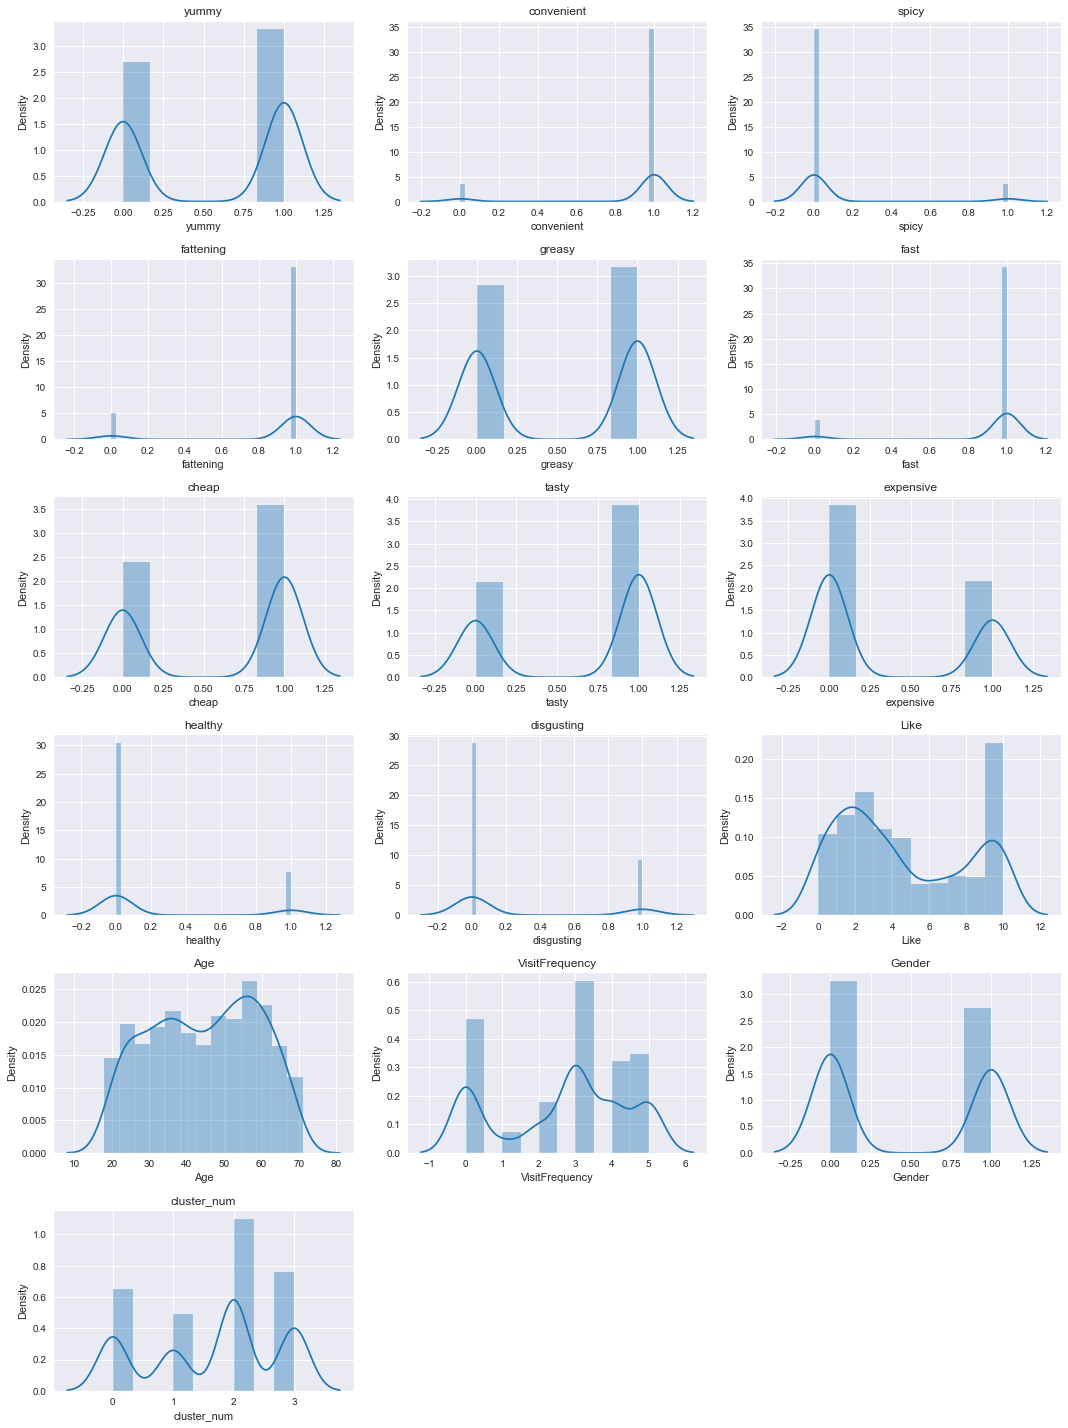

In [212]:
import seaborn as sns

plt.figure(figsize=(15,20))
for i, col in enumerate(mcdonalds.columns):
    plt.subplot(6, 3, i+1)
    sns.distplot(mcdonalds[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Next
MD.pca <- prcomp(MD.x)

summary(MD.pca)


This R code performs a Principal Component Analysis (PCA) on the MD.x matrix created in the previous example using the prcomp() function, and then displays a summary of the results using the summary() function.

Specifically, prcomp(MD.x) is used to calculate the principal components of the MD.x matrix, which are linear combinations of the original variables that capture the maximum amount of variance in the data. The resulting object MD.pca is a list containing various components of the PCA, including the principal component scores, loadings, and the proportion of variance explained by each component.

The summary() function is then used to display a summary of the PCA results, including the standard deviations of the principal components, the proportion of variance explained by each component, and the cumulative proportion of variance explained. This summary can be useful for understanding how much of the variability in the original data is captured by each principal component, and for identifying which variables contribute the most to each component.

### Equivalent python code

In [8]:
from sklearn.decomposition import PCA
MD_pca = PCA()
MD_pca.fit(MD_x)

PCA()

In [9]:
MD_pca.transform(MD_x).shape

(1453, 11)

In [10]:
print(MD_pca.components_.round(1))
print(MD_pca.explained_variance_ratio_.round(2))

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]
[0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]


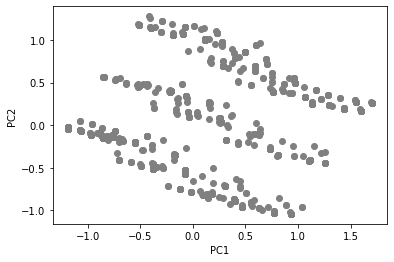

In [11]:
import matplotlib.pyplot as plt
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c='grey')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [12]:
print(MD_pca.explained_variance_ratio_)
pc = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
pd.DataFrame(MD_pca.explained_variance_ratio_,pc).reset_index().rename(columns={'index':"PC",0:'explained_variance_ratio'})

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


,PC,explained_variance_ratio
0,PC1,0.299447
1,PC2,0.192797
2,PC3,0.133045
3,PC4,0.083096
4,PC5,0.059481
5,PC6,0.050300
6,PC7,0.043849
7,PC8,0.039548
8,PC9,0.036761
9,PC10,0.032353


In [13]:
# Explanined varience gradually with increasing Principal componenet
np.cumsum(MD_pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [30]:
component = pd.DataFrame(MD_pca.components_,columns=pc).reset_index()
component['index'] = mcdonalds.columns.tolist()[0:11]
component=component.set_index('index')

<AxesSubplot:ylabel='index'>

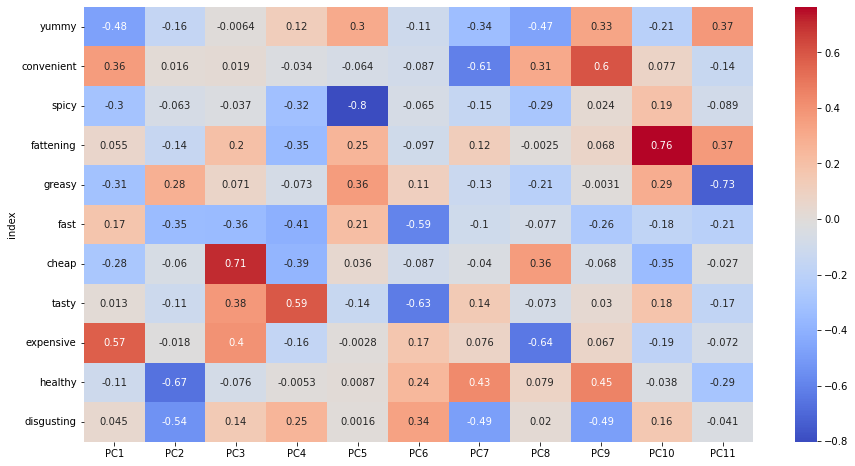

In [35]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(component,annot=True,cmap = 'coolwarm')

In [15]:
MD_pca.explained_variance_

array([0.57312398, 0.36900226, 0.2546408 , 0.15904032, 0.11384214,
       0.09627033, 0.08392454, 0.07569209, 0.07035814, 0.06192225,
       0.05612296])

In [16]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

np.random.seed(1234)
n_clusters = range(2, 9)
n_rep = 10

MD_kmedoids = {}
for n_cluster in n_clusters:
    MD_kmedoids[n_cluster] = []
    for i in range(n_rep):
        kmedoids = KMedoids(n_clusters=n_cluster, random_state=i)
        kmedoids.fit(MD_x)
        MD_kmedoids[n_cluster].append(kmedoids)

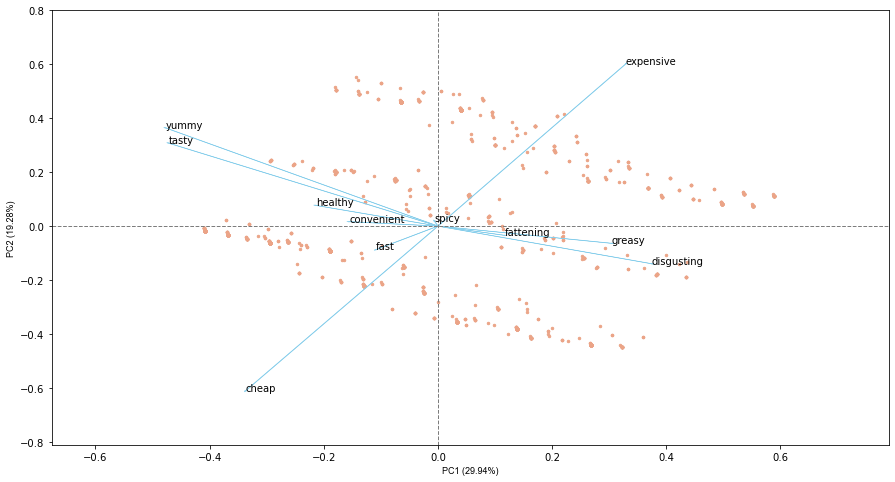

In [17]:
from bioinfokit.visuz import cluster
# get PC scores
pca_scores = MD_pca.transform(MD_x)
loadings = MD_pca.components_
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=mcdonalds.columns.tolist()[0:11], var1=round(MD_pca.explained_variance_ratio_[0]*100, 2),
    var2=round(MD_pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(15,8))

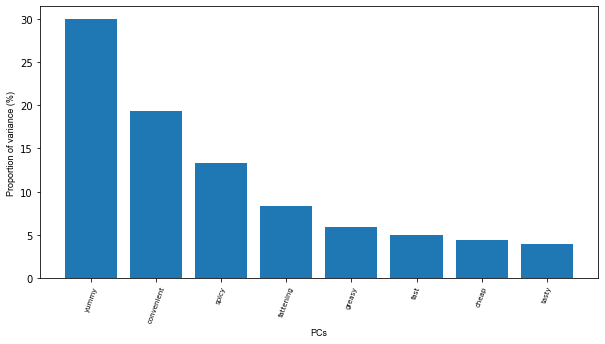

In [18]:
cluster.screeplot(obj=[mcdonalds.columns.tolist()[0:8], MD_pca.explained_variance_ratio_[0:8]],show=True,dim=(10,5))

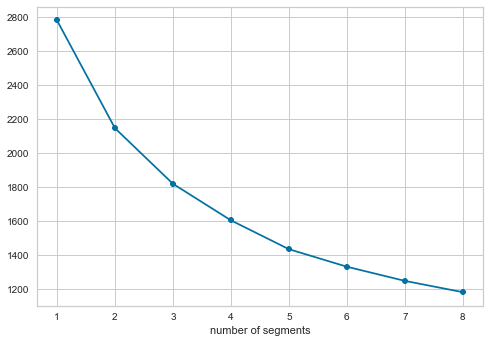

In [41]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234, verbose=False)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 9), inertias,marker = '8')
plt.xlabel('number of segments')
plt.show()

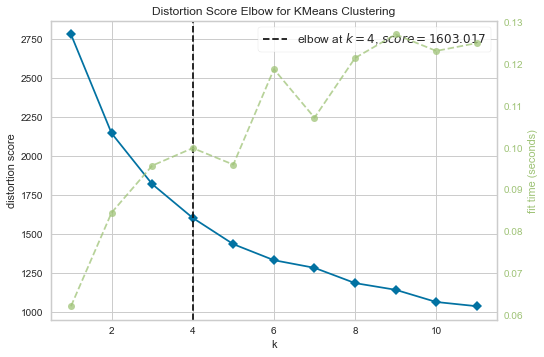

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(MD_x)
visualizer.show()

In [40]:
from sklearn.utils import resample
nrepo = 10

for i in range(nrepo):
    
    for k in range(1, 9):
        X = resample(MD_x,n_samples=100,random_state=i)
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234, verbose=False)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    


In [66]:
kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=134, verbose=False)
kmeans4.fit(MD_x)
transformed_data = MD_pca.fit_transform(MD_x)
mcdonalds['cluster_num'] = kmeans4.labels_ #adding to df
print (kmeans4.labels_) #Label assigned for each data point
print(kmeans4.cluster_centers_) #Location of the centroids on each cluster. 


[3 0 0 ... 0 2 1]
[[0.87341772 0.95886076 0.13607595 0.90506329 0.60759494 0.85759494
  0.10759494 0.93037975 0.91772152 0.20886076 0.10759494]
 [0.02109705 0.67510549 0.07172996 0.91561181 0.70464135 0.73839662
  0.05485232 0.06751055 0.89451477 0.06329114 0.72151899]
 [0.96622889 0.98123827 0.08442777 0.77861163 0.34896811 0.9587242
  0.92307692 0.97373358 0.01876173 0.33958724 0.04690432]
 [0.01907357 0.90735695 0.08446866 0.93188011 0.59945504 0.95640327
  0.90190736 0.29155313 0.02179837 0.07356948 0.33514986]]


In [68]:
transformed_data.shape

(1453, 11)

In [73]:
pf = pd.DataFrame(transformed_data,columns=pc).reset_index()
pf=pf.set_index('index')

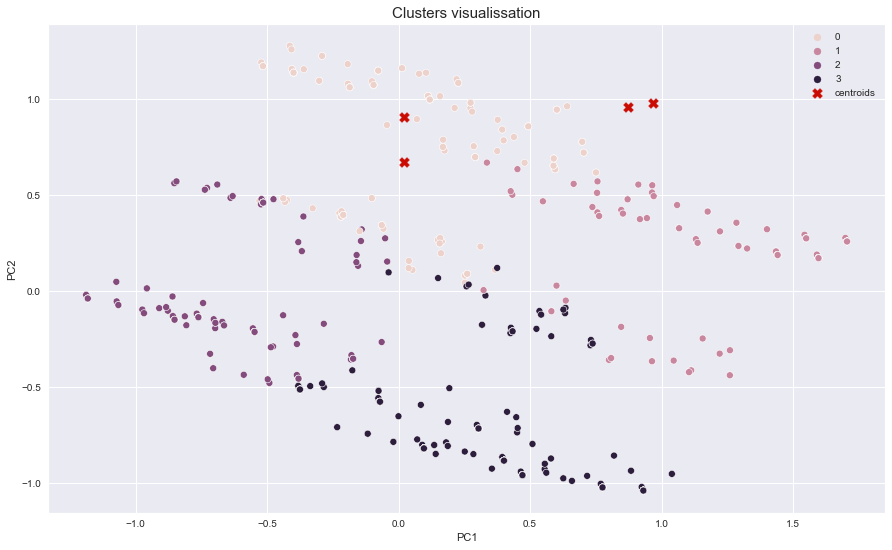

In [207]:
#each cluster size
plt.figure(figsize=(15,9))
from collections import Counter
Counter(kmeans4.labels_)
mcdonalds['cluster_num'] = kmeans4.labels_
#Visulazing clusters
sns.scatterplot(data=pf, x="PC1", y="PC2", hue=kmeans4.labels_)
plt.scatter(kmeans4.cluster_centers_[:,0], kmeans4.cluster_centers_[:,1], 
            marker="X", c="r", s=100, label="centroids")
plt.title('Clusters visualissation',fontsize = 15)
plt.legend()


Text(0, 0.5, 'sum of within cluster distances')

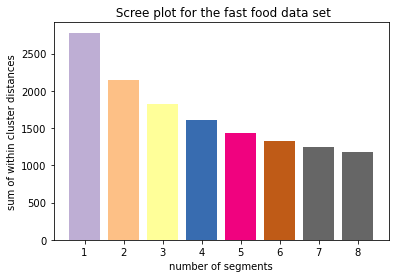

In [24]:
colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b',]
plt.bar(range(1,9),inertias,color=plt.cm.Accent(range(1,9)))
plt.title(' Scree plot for the fast food data set')
plt.xlabel('number of segments')
plt.ylabel('sum of within cluster distances')

<Figure size 1224x720 with 0 Axes>

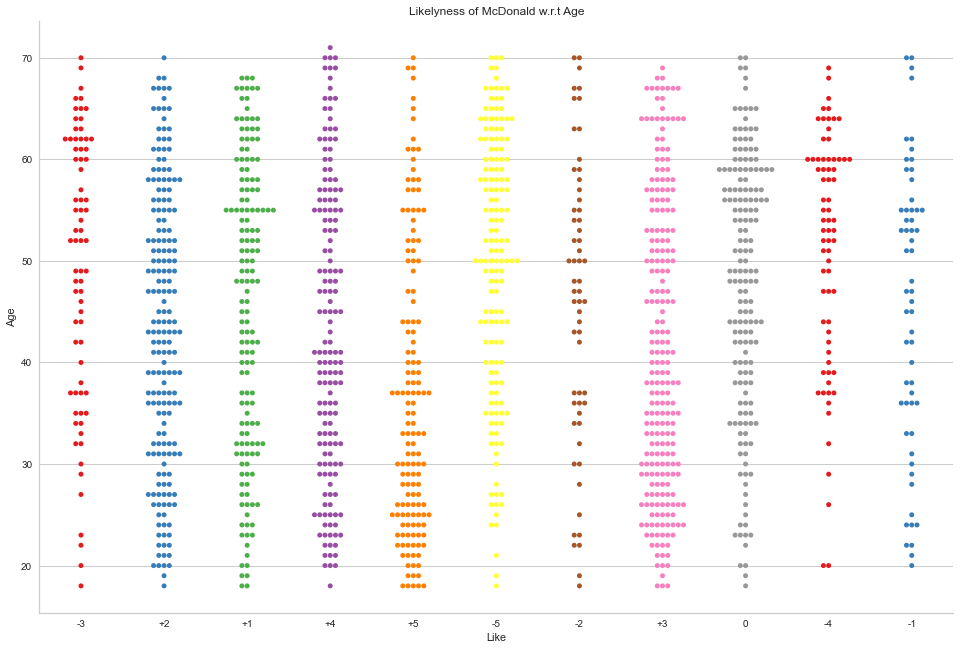

In [83]:
#Customer segmentation - based on pyschographic segmentation
plt.figure(figsize=(17,10))
#For convinence renaming the category
mcdonalds['Like']= mcdonalds['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.catplot(x="Like", y="Age",data=mcdonalds, 
            orient="v", height=9, aspect=1.5, palette="Set1",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [86]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

cros_tab =pd.crosstab(mcdonalds['cluster_num'],mcdonalds['Like'])
#Reordering cols
cros_tab = cros_tab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
cros_tab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,6,33,41,58,66,47,44
1,87,27,30,18,12,35,14,6,8,0,0
2,2,3,1,6,10,34,51,79,138,110,99
3,58,38,35,29,30,67,46,44,17,3,0


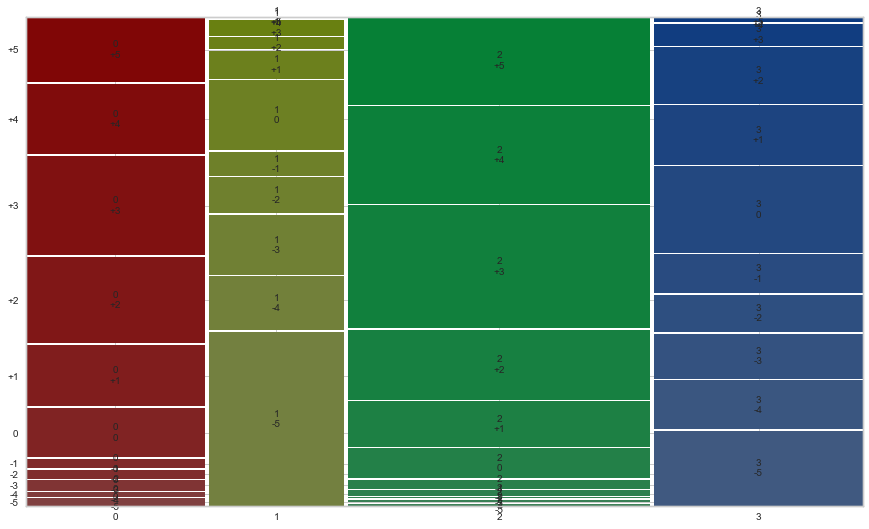

In [89]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (15,9)
mosaic(cros_tab.stack())
plt.show()

In [91]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(mcdonalds['cluster_num'],mcdonalds['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,150,166
1,101,136
2,324,209
3,213,154


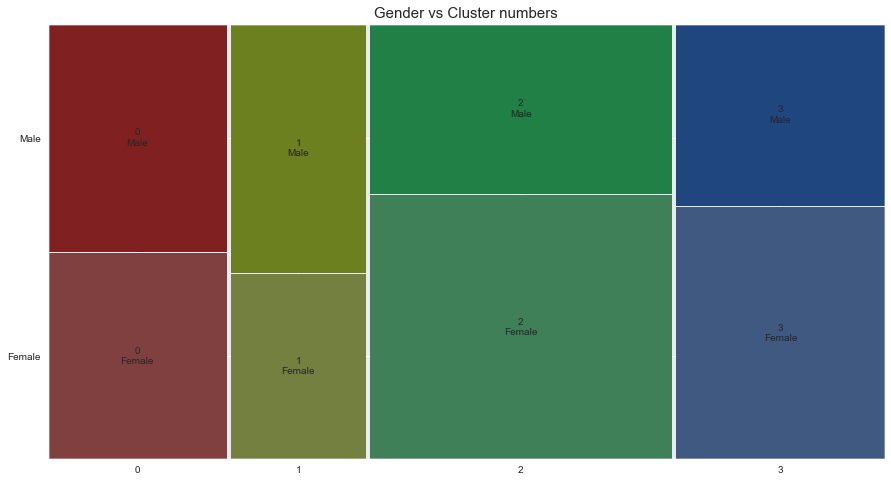

In [204]:
plt.rcParams['figure.figsize'] = (15,8)
mosaic(crosstab_gender.stack())
plt.title("Gender vs Cluster numbers",fontsize =15)
plt.show()

Text(0.5, 1.0, 'Age distribution for each cluster using box plot')

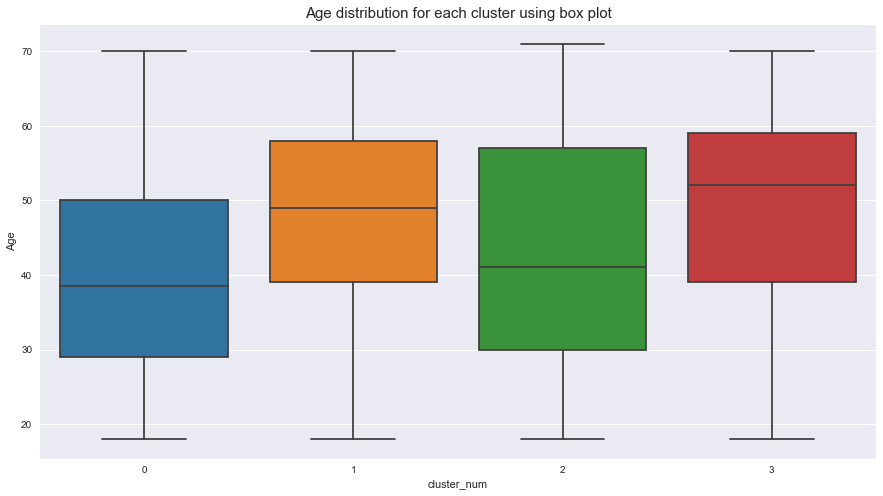

In [205]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=mcdonalds)
plt.title("Age distribution for each cluster using box plot",fontsize = 15)

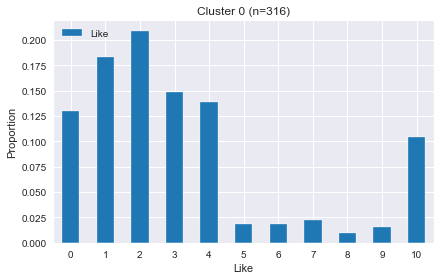

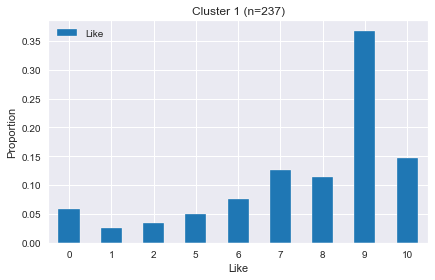

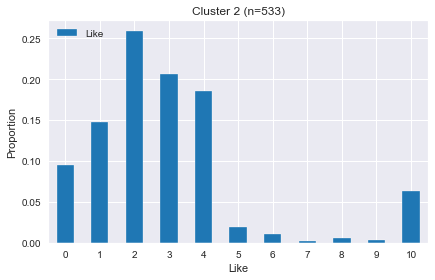

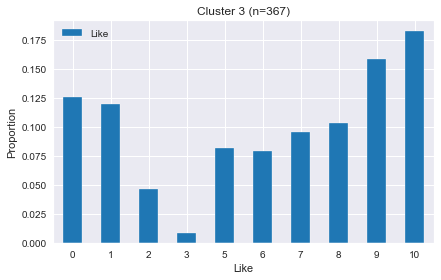

In [197]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('tab10')
# create stacked bar charts for each cluster
for i in range(mcdonalds['cluster_num'].nunique()):
    
    plt.subplot(2,2,i+1)
    cluster = mcdonalds[mcdonalds['cluster_num'] == i]
    like_counts = cluster['Like'].value_counts(normalize=True).sort_index()
    like_counts.plot(kind='bar', stacked=True,figsize=(15,9))
    plt.xticks(rotation=0)
    plt.xlabel('Like')
    plt.ylabel('Proportion')
    plt.title(f'Cluster {i} (n={len(cluster)})')
    plt.legend(loc='upper left')
    plt.show()

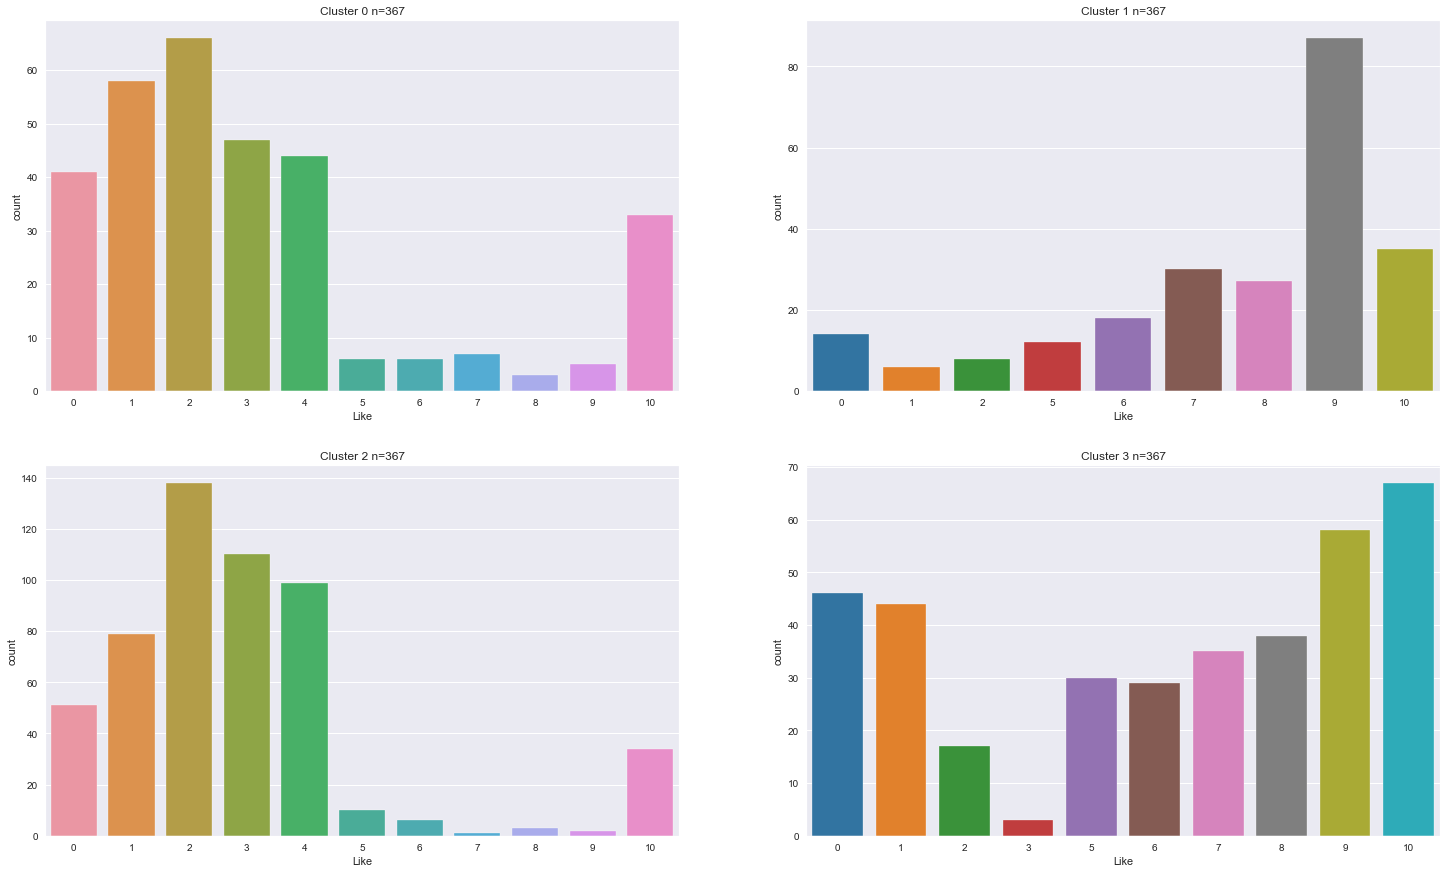

In [202]:
plt.figure(figsize=(25,15))
for i in range(mcdonalds['cluster_num'].nunique()):
    plt.subplot(2,2,i+1)
    sns.countplot(mcdonalds[mcdonalds['cluster_num'] == i],x = 'Like')
    plt.title(f'Cluster {i} n={len(cluster)}')
    

In [98]:
#Calculating the mean
#Visit frequency
from sklearn.preprocessing import LabelEncoder
mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit = mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.550633
1,1,2.708861
2,2,2.602251
3,3,2.719346


In [100]:
mcdonalds['Like'] = LabelEncoder().fit_transform(mcdonalds['Like'])
Like = mcdonalds.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.231013
1,1,7.379747
2,2,2.919325
3,3,5.863760


In [101]:
#Gender
mcdonalds['Gender'] = LabelEncoder().fit_transform(mcdonalds['Gender'])
Gender = mcdonalds.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.525316
1,1,0.573840
2,2,0.392120
3,3,0.419619


In [102]:
var_segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
var_segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.525316,3.231013,2.550633
1,1,0.573840,7.379747,2.708861
2,2,0.392120,2.919325,2.602251
3,3,0.419619,5.863760,2.719346


In [103]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.525316,3.231013,2.550633
1,1,0.573840,7.379747,2.708861
2,2,0.392120,2.919325,2.602251
3,3,0.419619,5.863760,2.719346


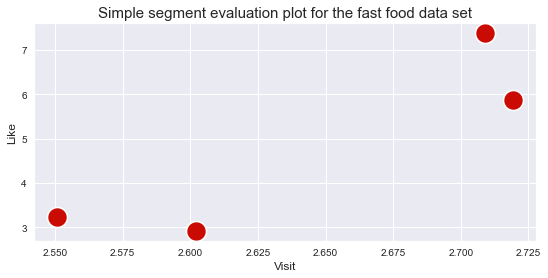

In [203]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()

This is a scatterplot showing the relationship between the variables "VisitFrequency" and "Like" for a certain dataset segment. Each point on the plot represents a data point in the dataset. The x-axis displays the "VisitFrequency" variable, which measures how frequently an individual eats at a fast food establishment. The y-axis displays the "Like" variable, which reflects how much a person appreciates fast food.

The graph shows four unique clusters or groups of data points. Those in the lower-left group visit fast food establishments seldom and have a low liking for fast food. Those in the lower-right group frequent fast food establishments yet have a negative attitude of fast food. Those in the top-left group visit fast food establishments seldom yet show a strong preference for fast food. Those in the top-right group frequent fast food establishments and show a strong preference for fast food.
The narrative aids in determining the fast food industry's target demographic. The top-right group is the perfect target demographic since they frequent fast food places and appreciate rapid meals.

The industry could focus its marketing and promotions on this group to increase sales and profitability.
